<a href="https://colab.research.google.com/github/jwoo13/Computer1/blob/main/%EC%98%A4%EC%B8%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


/tmp/ipython-input-2138798245.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0,256])


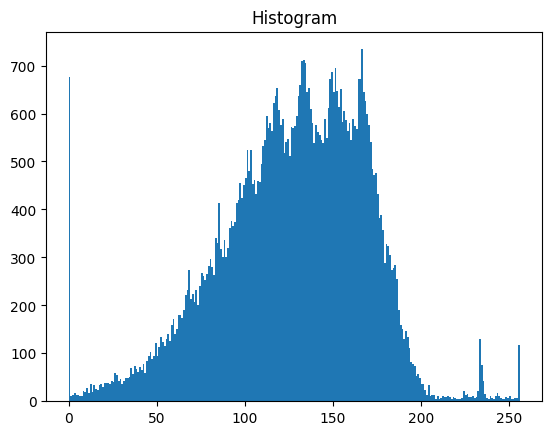

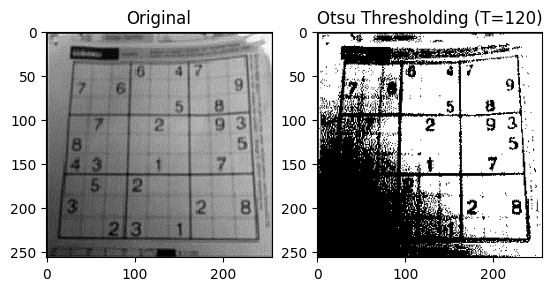

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. raw 파일 읽기
width, height = 256, 256
raw = np.fromfile("스도쿠256.raw", dtype=np.uint8)
img = raw.reshape((height, width))  # (세로, 가로)

# 2. 히스토그램 계산
hist, bins = np.histogram(img.ravel(), bins=256, range=(0,256))
plt.hist(img.ravel(), 256, [0,256])
plt.title("Histogram")
plt.show()

# 3. Otsu 이진화 구현
total = img.size
current_max, threshold = 0, 0
sum_total = np.sum(np.arange(256) * hist)
sumB, wB = 0, 0

for i in range(256):
    wB += hist[i]
    if wB == 0:
        continue
    wF = total - wB
    if wF == 0:
        break
    sumB += i * hist[i]
    mB = sumB / wB
    mF = (sum_total - sumB) / wF
    # Between Class Variance
    var_between = wB * wF * (mB - mF) ** 2
    if var_between > current_max:
        current_max = var_between
        threshold = i

# 임계값 적용
otsu = (img > threshold).astype(np.uint8) * 255

# 4. 결과 출력
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(otsu, cmap='gray')
plt.title(f"Otsu Thresholding (T={threshold})")
plt.show()